<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 9 - HANDS ON MACHINE LEARNING**
## **Aprendizaje no supervisado**

Aunque buena parte de la bibliografia se enfoca en los problemas de aprendizaje supervisado, estos en realidad son minoritarios frente a los problemas donde debemos utilizar tecnicas de aprendizaje no supervisado. En general es mas facil pensar que para un conjunto de instancias $\mathbf{X}$ no vamos a tener un conjunto de etiquetas $\mathbf{Y}$ que le correspondan.

Algunas tecnicas de aprendizaje no supervisado que podemos utilizar en general son:

1. Reduccion de dimensionalidad; Tal como vimos en el capitulo $8$ la reduccion de dimensionalidad nos permite trabajar con un numero reducido de las features originales. 

2. Clustering; El objetivo de esta tecnica es agrupar instancias segun alguna metrica de similaridad. La idea justamente es armar clusters lo mas disjuntos posibles.

3. Deteccion de anormalidades; Sirve para detectar justamente cuales son los datos "normales" de un determinado tipo e identificar los que estan fuera de este refimen de normalidad.

4. Estimacion de densidad; La idea es poder estimar la funcion densidad de probabilidad (PDF) de una muestra de instancias. 

Primero vamos a ver como realizar problemas de clustering y luego vamos a ver algo en menor profundidad de los otros.

## **Clustering**

En general los metodos de clustering se pueden usar para un monton de propositos distintos. Pueden ser usados para reducir la dimension de los datos, para asignar etiquetas, para asignar etiquetas cuando ya contamos con algunas de ellas, etc etc.. 

Pero hay una pregunta que parece previa y es, ¿que es un cluster?

La realidad es que no hay una definicion unica de lo que significa un cluster y segun el metodo que se use para resolver el problema se va a estar usando una definicion u otra, sin embargo intuitivamente es facil de pensar como un conjunto de instancias que comparten lo suficiente como para agruparlas entre si y son lo suficientemente distintas de otras como para separarlas de estas.

El libro se propone explicar el funcionamiento de dos de los metodos principales de clustering, DBSCAN y K-means.

## **k-Means**

Para ver como funciona vamos a empezar generando un conjunto de instancias con 2 features.

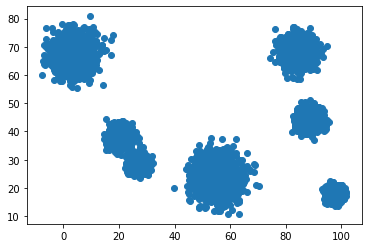

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


N = 1000
Clusters = 7
alfa = 100
beta = 5

x_datos = []
y_datos = []

for c in range(Clusters):
  x0 = alfa*np.random.rand()
  y0 = alfa*np.random.rand()
  sigma = beta*np.random.rand()
  x = list(np.random.normal(x0,sigma,N)) 
  y = list(np.random.normal(y0,sigma,N)) 
  x_datos = x_datos + x
  y_datos = y_datos + y

plt.scatter(x_datos,y_datos)

x = pd.DataFrame()
x["X"] = x_datos
x["Y"] = y_datos

Ahora voy a utilizar estos datos para tratar de encontrar clustes en ellos. Uso la implementacion de SkLearn.

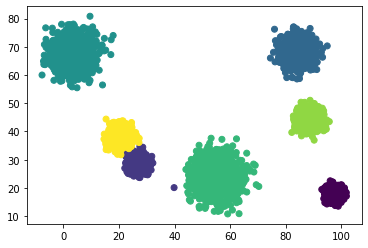

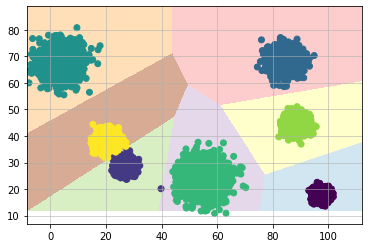

In [2]:
from sklearn.cluster import KMeans
k = Clusters
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x)

plt.figure()
plt.scatter(x_datos,y_datos,c=y_pred)

h = 0.1     
x_min, x_max = 1.1*min(x_datos),1.1*max(x_datos)
y_min, y_max = 1.1*min(y_datos),1.1*max(y_datos)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(x_datos,y_datos,c=y_pred)
plt.grid(axis="both", alpha=0.7)

Además podemos pedirle que nos devuelva los centroides de cada cluster. Vamos a graficarlos para ver donde se encuentran. 

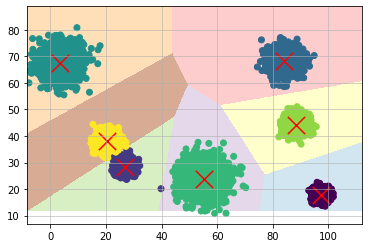

In [3]:
centroides = pd.DataFrame(kmeans.cluster_centers_)
plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(x_datos,y_datos,c=y_pred)
plt.scatter(centroides[0],centroides[1],marker='x',s=300,linewidths=1,c='red')
plt.grid(axis="both", alpha=0.7)


La division resultante entre los clusters y las regiones que definen se llama de _Voroni_. 

Este tipo de clasterizacion se llama _hard clustering_ porque asigna cada instancia a un unico cluster. Otra cosa que se puede hacer es utilizar una estrategia de _soft culustering_ que asigna un score. Este score puede ser definido de muchas formas, una forma comunmente utilizada es directamente asignar la distancia al centroide.

In [4]:
nueva = pd.DataFrame(data = [[60,60]],columns=['X','Y'])
dis = kmeans.transform(nueva)
print(dis)
print(type(dis))


[[56.39080398 45.77597315 25.49490425 57.06556135 36.3942602  32.51649838
  45.28933674]]
<class 'numpy.ndarray'>


Laburar un poco mas esto. Mostrar como usar esto para armar un nuevo unico indicador.



### **El algoritmo de K-Means**

El algoritmo de K-Means es bastante sencillo en terminos de su logica. Lo primero que debemos considerar del mismo es que debemos ser nosotros los que a priori decidimos el numero de clusters que el algortimo va a considerar y por lo tanto encontrar. Esta es quizas una de las principales caracteristicas y desventajas de este metodo. Si nosotros a priori no sabemos cuantos clusters debemos identificar el algoritmo no es capaz de hacerlo. Sin embargo mas adelante vamos a ver como podemos utilizar algun criterio para eludir este problema.

Bueno, el primer paso es elegir el numero de clusters $N$. Una vez que decidimos este numero el algoritmo debe elegir una posicion inicial para cada uno de ellos. Una forma de elegir la posicion es utilizar una posicion al azar. Por ejemplo se puede indicar que la posicion de alguna instancia random es la posicion de un cluster. De esta forma, eligiendo $N$ instancias al azar elegimos los centroides iniciales de los $N$ clusters. Una vez que elegimos estas posiciones asignamos las instacias a cada uno de estos clusters. Para hacer esta asignacion utilizamos la distancia de ellas a cada centroide. Lo que hacemos es decir que una instancia pertenece al cluster que tenga su centroide mas cercano. Una vez que tenemos estas instancias etiquetadas volvemos a calcular el centroide pero esta vez buscando el centro de masa del mismo (O sea, el promedio de las posiciones de las instancias con su etiqueta). Este proceso lo iteramos hasta que nosotros deseemos finalizarlo. Un criterio posible para finalizar el metodo es definir una tolerancia de distancia. De esta forma, cuando los centroides se muevan menos de esta tolerancia terminamos el metodo. En la figura $9.4$ del libro se muestran un par de pasos de este metodo para una dada configuracion de puntos. Es una muestra grafica bastante buena del proceso. Obviamente este metodo no tiene una solucion unica y va a depender de las posiciones iniciales elegidas inicialmente. Para tratar este problema existen distintas soluciones. En el caso de que nosotros sepamos maso menos por donde estan los clusters podemos fijar a mano la posicion inicial de los centroides con el parametro "init". Sin embargo son muy raras las ocasiones donde esto ocurre. En general nosotros desconocemos las posiciones de los clusters. Para este caso lo que podemos hacer es correr varias veces el algoritmo. De hecho, por default, el algoritmo corre 10 veces (eligiendo 10 conjuntos de posiciones iniciales aleatorias distintas), pero nosotros podriamos aumentar este numero con el parametro "n_init". Ahora, sabiendo que el algoritmo va a correr n_init veces, ¿con cual de las soluciones se queda?
Para esto se define una metrica que permite elegir la mejor de todas estas soluciones. En particular la metrica que usa la implementacion de SkLearn es la inercia. La inercia calcula la _Mean squared distance_ entre las instancias y sus centroides. O sea, calcula la distancia al cuadrado entre cada instancia y el centroide al que pertenece y se queda con el valor medio. Obviamente cuanto mas bajo sea este valor mejor es el funcionamiento del algoritmo. De esta forma el algoritmo selecciona el modelo que menor inercia le de. Si queremos podemos preguntarle cual fue el valor de inercia alcanzado para la solucion encontrada. A su vez podemos pedirle el valor de score del metodo, que curiosamente nos da el valor de inercia negativo. ¿Por que da negativo?, para mantener la convencion de SkLearn de que el score cuanto mas alto mejor. Solo una convencion. Sobre este metodo basico se pueden agregar distintas optimizaciones como por ejemplo una mejor eleccion de los centroides iniciales, o la forma en que se calculan las distancias pero la verdad que no es demasiado significativo saber estas cosas salvo que uno se dedique a este problema de forma muy particular. Otra optimizacion posible y que puede ser de utilidad es la utilizacion de mini-batches para la busqueda de clusters. Recordemos que para poder implementar necesitamos tener todas las instancias de entrenamiento. Si estas son muchas podemos tener un problema de almacenamiento en memoria. Para resolver este problema existe una implementacion de SkLearn ("MiniBatchKMeans") que permite partir el conjunto total de instancias en batches que entren en memoria.

### **Buscando el numero optimo de clusters**

Como dijimos antes, para poder utilizar K-Means debemos saber cuantos clusters queremos encontrar. Sin embargo la mayor parte de las veces este es un dato que no sabemos. Incluso, muchas veces lo mas importante de la tarea de clasificacion no es tanto cuales son los clusters sino cuantos hay. Para afrontar este problema existe el criterio del codo. El criterio consiste en graficar la inercia obtenida para distintos numeros de clusters en la busqueda del algoritmo. Lo esperable es que la inercia baje al aumentar la cantidad de clusters que buscamos. De hecho, en el limite donde tenemos tantos clusters como instancias lo esperable seria que la inercia valga cero porque cada centroide coincide con una instancia. Sin embargo el criterio del codo nos dice que viendo la curva de mejora en la inercia podemos elegir un numero optimo de clusters donde veamos un "codo".

Text(0.5, 1.0, 'Criterio del codo')

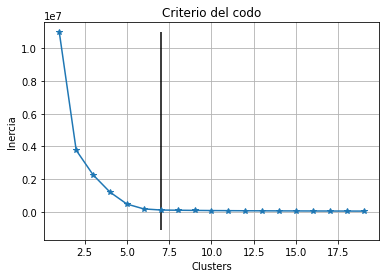

In [5]:
inercia = []
clusters = []
for k in range(1,20):
  clusters.append(k)
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x)
  inercia.append(kmeans.inertia_)
  

plt.plot(clusters,inercia,"*-")
plt.vlines(Clusters,-max(inercia)/10,max(inercia))
plt.xlabel("Clusters")
plt.ylabel("Inercia")
plt.grid()
plt.title("Criterio del codo")

Sin embargo existe otro metodo un poco mas preciso que es el de _silhouette score_. Este metodo utiliza el coeficiente de Silhoutte, el cual calcula sobre todas las instancias y luego realiza el promedio sobre todas ellas. El coeficiente sobre una instancia se calcula como:

$S_{c}^i=\dfrac{b-a}{max(a,b)}$

Donde $a$ es la distancia media entre la instancia $i$-esima y el resto de las instancias del mismo cluster. Por otro lado $b$ es la distancia media entre la instancia $i$-esima y las instancias del cluster mas cercano. O sea, pesa cuan cerca estan las instancias de un mismo cluster por cuan separadas estan del cluster mas proximo. El coeficiente para una dada instancia se puede mover entre $[-1,1]$. El valor maximo de $1$ se alcanza cuando $a\rightarrow0$ indicando que la instancia esta bien clasificada. El caso opuesto con $S_{c}^i=-1$ indica que probablemente la instancia esta clasificada en el cluster incorrecto. El promedio sobre todas las instancias es el Score de Silhouette.



Text(0.5, 1.0, 'Criterio Silhouette')

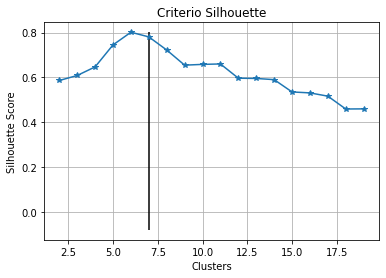

In [6]:
from sklearn.metrics import silhouette_score

silhouette = []
clusters = []
for k in range(2,20):
  clusters.append(k)
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x)
  silhouette.append(silhouette_score(x, kmeans.labels_))

plt.plot(clusters,silhouette,"*-")
plt.vlines(Clusters,-max(silhouette)/10,max(silhouette))
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.title("Criterio Silhouette")
  